#**PyTorch III**
Autor: Jheremy Reyes,

estudiante de matemáticas,

Universidad El Bosque


**Producto matricial**

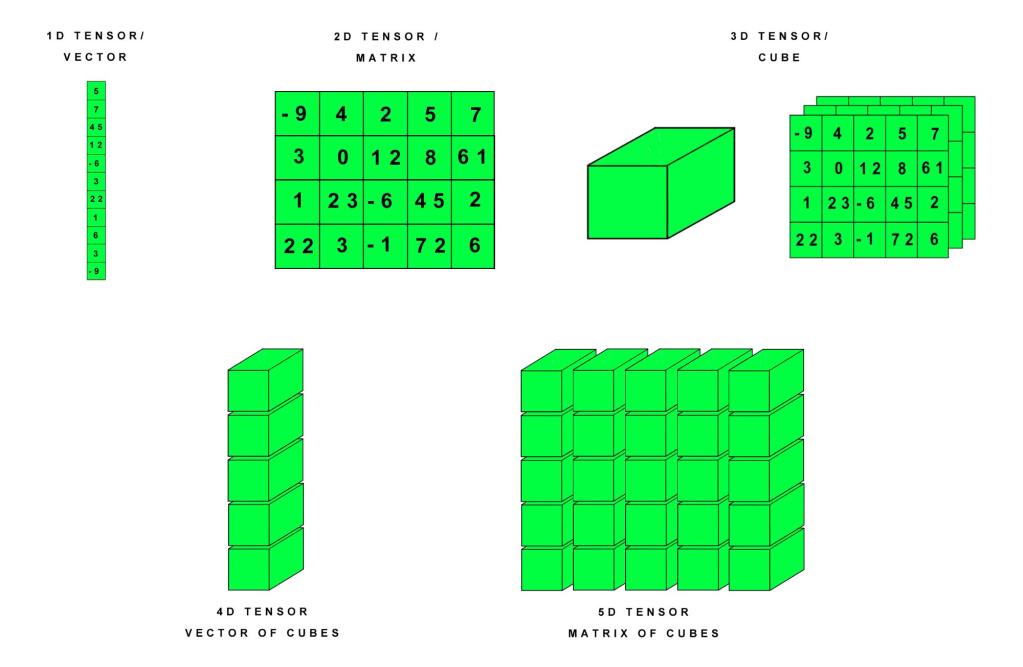

**Conceptos Clave**

El producto matricial (o producto punto) es una operación fundamental en álgebra lineal y deep learning, utilizada en:

Capas fully connected (nn.Linear).

Cálculo de atención en Transformers.

Operaciones entre tensores de alta dimensión.

PyTorch implementa múltiples variantes para diferentes casos de uso.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = torch.randn(3, 4)  # Matriz 3x4
B = torch.randn(4, 5)  # Matriz 4x5
C = torch.matmul(A, B) # Resultado 3x5
# Equivalente: C = A @ B

**Producto estándar (matrices 2D)**

In [ ]:
A = torch.randn(3, 4)  # Matriz 3x4
B = torch.randn(4, 5)  # Matriz 4x5
C = torch.matmul(A, B) # Resultado 3x5
# Equivalente: C = A @ B

**Producto por lotes (batched)**

In [ ]:
batch_A = torch.randn(10, 3, 4)  # Lote de 10 matrices 3x4
batch_B = torch.randn(10, 4, 5)  # Lote de 10 matrices 4x5
batch_C = torch.bmm(batch_A, batch_B)  # Resultado 10x3x5

**Producto vector-matriz**

In [ ]:
v = torch.randn(4)     # Vector (4,)
M = torch.randn(4, 5)
result = v @ M         # Resultado (5,)

**Einsum (notación Einstein)**

In [ ]:
# Equivalente a A @ B
C = torch.einsum('ik,kj->ij', A, B)

# Contrato múltiples dimensiones
D = torch.einsum('bik,bkj->bij', batch_A, batch_B)  # = bmm

**Reglas de Broadcasting**

In [ ]:
A = torch.randn(5, 3, 4)  # 5 matrices 3x4
B = torch.randn(4, 6)      # Matriz 4x6
C = A @ B                  # Resultado 5x3x6 (broadcasting sobre el lote)

**Consideraciones de Rendimiento**

GPU: Todas las operaciones se aceleran con CUDA.

Precisión mixta: Usar torch.cuda.amp para autocasting (FP16/FP32).

**Optimización:**

torch.backends.cudnn.allow_tf32 = True (TF32 en Ampere+).

Para matrices grandes, preferir matmul sobre einsum.

In [ ]:
# Definir los tensores con dtype adecuado
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.int64)  # Cambié a int64
b = torch.ones([2, 2], dtype=torch.int64)  # Cambié a int64

# Multiplicación de matrices usando @
print(a @ b)

# Multiplicación de matrices usando einsum
e = torch.einsum('ij,jk->ik', a, b)
print(e)

tensor([[3, 3],
        [7, 7]])
tensor([[3, 3],
        [7, 7]])


In [ ]:
# Definir el tensor e
e = torch.tensor([[3, 3], [7, 7]])

# Transpuesta usando einsum
et = torch.einsum('ij->ji', e)
print(et)

# Alternativamente, usando .T
et_alt = e.T
print(et_alt)

# Otra forma usando .transpose()
et_alt2 = e.transpose(0, 1)
print(et_alt2)

tensor([[3, 7],
        [3, 7]])
tensor([[3, 7],
        [3, 7]])
tensor([[3, 7],
        [3, 7]])


In [ ]:
# Crear los tensores con las mismas dimensiones
s = torch.ones(size=(7, 5, 3))
t = torch.ones(size=(7, 3, 2))

# Producto matricial por lotes (batch)
m = torch.einsum('bij,bjk->bik', s, t)

# Imprimir la forma resultante
print(m.shape)


torch.Size([7, 5, 2])


In [ ]:
# Definir los vectores
u = torch.ones(size=(3,))
v = torch.ones(size=(5,))

# Producto exterior usando einsum
e1 = torch.einsum('i,j->ij', u, v)
print(e1.shape)

# Alternativamente, usando torch.outer()
e1_alt = torch.outer(u, v)
print(e1_alt.shape)


torch.Size([3, 5])
torch.Size([3, 5])


In [ ]:
# Generar vectores aleatorios con distribución normal
u = torch.randn(3)  # Equivalente a tf.random.normal(shape=[3])
v = torch.randn(3)

# Producto punto usando einsum
e2 = torch.einsum('i,i->', u, v)
print(e2)

# Alternativamente, usando torch.dot()
e2_alt = torch.dot(u, v)
print(e2_alt)

tensor(-2.5587)
tensor(-2.5587)


In [ ]:
# Crear una matriz 3x3 con valores de 0 a 8
m = torch.arange(9).reshape(3, 3)

# Extraer la diagonal usando einsum
diag = torch.einsum('ii->i', m)
print(diag.shape)

# Alternativamente, usando torch.diag()
diag_alt = torch.diag(m)
print(diag_alt.shape)

torch.Size([3])
torch.Size([3])


**Compatibilidad entre numpy arrays y tensores**

Uno de los aspectos más útiles de PyTorch para científicos de datos y usuarios de Python en general es su alta compatibilidad con numpy, la popular librería para cálculo numérico en Python. Esta interoperabilidad facilita la conversión y el trabajo conjunto entre arreglos (arrays) de numpy y los tensores (tensors) de PyTorch, lo cual permite aprovechar lo mejor de ambos mundos: la flexibilidad y riqueza de numpy, y la potencia computacional (incluyendo GPU) de PyTorch.

**Conversión de numpy a tensor**

PyTorch permite convertir un numpy array a un tensor utilizando la función torch.from_numpy(). Esta conversión no copia los datos, sino que el tensor resultante comparte la misma memoria que el numpy array original. Esto significa que si se modifica uno, el otro también cambia.

In [ ]:
import numpy as np
import torch

# Crear un numpy array
np_array = np.array([1, 2, 3, 4, 5])

# Convertir a tensor
tensor_from_np = torch.from_numpy(np_array)

print("Numpy array:", np_array)
print("Tensor:", tensor_from_np)


Numpy array: [1 2 3 4 5]
Tensor: tensor([1, 2, 3, 4, 5])


**Conversión de tensor a numpy**

Para convertir un tensor a un numpy array, se puede usar el método .numpy(), pero esto solo es posible si el tensor está en la CPU. Si el tensor está en la GPU, primero debe moverse a la CPU usando .cpu().

In [ ]:
# Convertir tensor a numpy array
np_array_from_tensor = tensor_from_np.numpy()
print("Array convertido de vuelta:", np_array_from_tensor)


Array convertido de vuelta: [1 2 3 4 5]


**Ejemplo de modificación compartida**
Como el tensor y el array comparten memoria, cualquier cambio en uno afectará al otro

In [ ]:
# Modificamos el numpy array
np_array[0] = 100
print("Tensor después del cambio en numpy array:", tensor_from_np)

# También podemos modificar el tensor
tensor_from_np[1] = 200
print("Numpy array después del cambio en tensor:", np_array)


Tensor después del cambio en numpy array: tensor([100,   2,   3,   4,   5])
Numpy array después del cambio en tensor: [100 200   3   4   5]


**Conversión con GPU**
Si estamos trabajando con tensores en GPU, no podemos convertirlos directamente a numpy. Hay que pasarlos primero a CPU:

In [ ]:
# Crear un tensor en PyTorch
m = torch.arange(9).reshape(3, 3)

# Sumar el tensor con su versión en NumPy
result = m + m.numpy()

print(result)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])


<ipython-input-19-a68e2d1f13de>:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  result = m + m.numpy()


In [ ]:
# Crear un array de NumPy
np_array = np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32)

# Convertir a tensor en PyTorch
value_3 = torch.tensor(np_array)  # O también torch.from_numpy(np_array)
print(value_3)


tensor([[1., 2.],
        [3., 4.]])


**Gradientes en PyTorch**

Uno de los aspectos más poderosos de PyTorch es su sistema automático de diferenciación, conocido como Autograd. Este sistema permite calcular derivadas de manera automática, lo que es esencial para entrenar redes neuronales mediante descenso del gradiente.

**¿Qué es un gradiente?**
En el contexto del aprendizaje automático, un gradiente indica cómo cambia una función (por ejemplo, una función de pérdida) respecto a sus parámetros (pesos y sesgos). Es un vector que apunta en la dirección de máximo aumento, por lo tanto, moverse en la dirección opuesta al gradiente es lo que permite minimizar funciones durante el entrenamiento.

**Tensores con gradientes**
Para que PyTorch rastree operaciones y permita calcular derivadas, el tensor debe tener el atributo requires_grad=True:

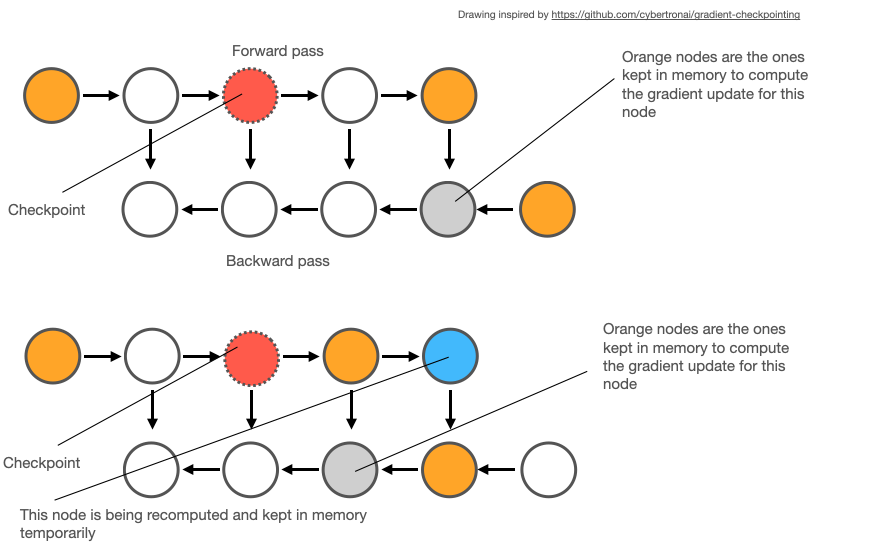

In [ ]:
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1  # una función escalar
y.backward()        # calcula dy/dx

print("Gradiente de y respecto a x:", x.grad)  # Resultado: 2x + 3 = 7


Gradiente de y respecto a x: tensor(7.)


Cuando se llama a backward(), PyTorch propaga hacia atrás la derivada desde el resultado (un escalar) hacia las variables involucradas, acumulando el gradiente en el atributo .grad del tensor.

**Acumulación de gradientes**
Los gradientes en PyTorch se acumulan por defecto en .grad. Por eso, si haces múltiples pasos de backward() sin reiniciar los gradientes, se sumarán:

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2
y.backward()
print(x.grad)  # 4.0

y = x**3
y.backward()
print(x.grad)  # 4.0 + 12.0 = 16.0 (acumulado)


tensor(4.)
tensor(16.)


In [ ]:
# Definir una variable con gradientes habilitados
x = torch.tensor(3.0, requires_grad=True)

# Calcular y = x^2
y = x**2

# Calcular el gradiente de y respecto a x
y.backward()  # Realiza la diferenciación automática

# Extraer el gradiente
dy_dx = x.grad
print(dy_dx.item())  # Convertir a escalar como en TensorFlow

6.0


In [ ]:
# Definir variables
trainable = torch.tensor(1.0, requires_grad=True)  # Variable entrenable
non_trainable = torch.tensor(2.0, requires_grad=False)  # Variable no entrenable

# Cálculo dentro del contexto de autograd
x1 = trainable * 2.0
x2 = non_trainable * 2.0

# Calcular gradiente solo para la variable entrenable
x1.backward()  # Solo funciona si requires_grad=True

# Extraer el gradiente
print(trainable.grad)  # Esto imprimirá 2.0

# Intentar calcular el gradiente de x2 (esto generaría un error si intentamos hacer x2.backward())
# x2.backward()  # NO FUNCIONA porque non_trainable tiene requires_grad=False


tensor(2.)


In [ ]:
# Definir variables
trainable = torch.tensor(1.0, requires_grad=True)  # Variable entrenable
non_trainable = torch.tensor(2.0, requires_grad=False)  # Variable no entrenable

# Iniciar un contexto de autograd
with torch.autograd.set_detect_anomaly(True):
    x1 = trainable * 2.0
    x2 = non_trainable * 2.0

# Listar variables rastreadas
watched_variables = [trainable] if trainable.requires_grad else []
print([id(var) for var in watched_variables])  # No hay nombres directos, pero podemos usar IDs o direcciones de memoria

[132829581794992]


In [ ]:
# Definir las variables
w = torch.randn((3, 2), requires_grad=True)  # Matriz 3x2 con valores aleatorios
b = torch.zeros(2, dtype=torch.float32, requires_grad=True)  # Vector de ceros de tamaño 2
x = torch.tensor([[1., 2., 3.]])  # Tensor de entrada 1x3

# Iniciar el contexto de autograd
with torch.autograd.set_detect_anomaly(True):
    y = x @ w + b  # Producto matricial + bias
    loss = torch.mean(y**2)  # Función de pérdida (MSE-like)

# Calcular gradientes
loss.backward()

# Extraer gradientes
dl_dw = w.grad
dl_db = b.grad

# Imprimir formas de los tensores
print(w.shape)       # torch.Size([3, 2])
print(dl_dw.shape)   # torch.Size([3, 2])
print(dl_db.shape)   # torch.Size([2])


torch.Size([3, 2])
torch.Size([3, 2])
torch.Size([2])


In [ ]:
# Forward pass y cálculo de pérdida
y = x @ w + b
loss = torch.mean(y**2)

# Backpropagation
loss.backward()

# Almacenar gradientes en un diccionario
my_vars = {'w': w, 'b': b}
grad = {key: var.grad for key, var in my_vars.items()}

# Imprimir gradiente de 'b'
print(grad['b'])

# Listar variables que están siendo rastreadas por autograd
watched_variables = [var for var in my_vars.values() if var.requires_grad]
print(watched_variables)  # PyTorch no tiene nombre

tensor([-0.6524,  1.8107])
[tensor([[ 0.5069, -1.3463],
        [-1.4436,  0.2190],
        [ 0.6847,  0.6045]], requires_grad=True), tensor([0., 0.], requires_grad=True)]


In [ ]:
# Definir variables
x0 = torch.tensor(0.0, requires_grad=True)  # Variable rastreada
x1 = torch.tensor(10.0, requires_grad=True)  # Variable rastreada manualmente

# Forward pass
y0 = torch.sin(x0)  # sin(x0)
y1 = torch.nn.functional.softplus(x1)  # softplus(x1)
y = y0 + y1  # Suma de términos
ys = y  # Ya es un escalar, no se necesita `sum()`

# Calcular gradientes de ys respecto a x0 y x1
gradients = torch.autograd.grad(ys, [x0, x1])

# Imprimir gradientes
print('dy/dx0:', gradients[0].item())  # Derivada de sin(x0) = cos(x0)
print('dy/dx1:', gradients[1].item())  # Derivada de softplus(x1) = sigmoide(x1)



dy/dx0: 1.0
dy/dx1: 0.9999545812606812


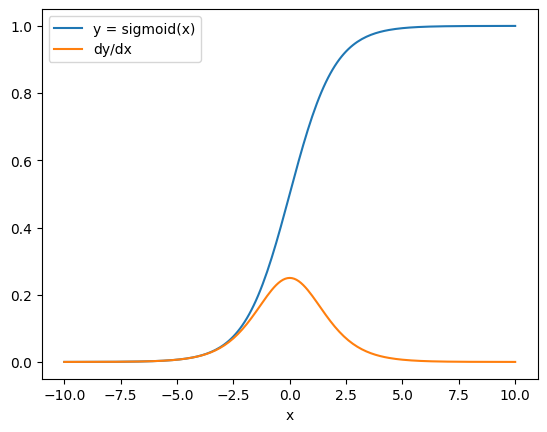

In [ ]:
# Crear un tensor de valores en el rango [-10, 10]
x = torch.linspace(-10.0, 10.0, steps=201, requires_grad=True)

# Calcular la función sigmoide
y = torch.sigmoid(x)

# Calcular la derivada usando autograd
y.backward(torch.ones_like(x))  # Gradiente de y respecto a x

# Obtener el gradiente
dy_dx = x.grad

# Graficar la función y su derivada
plt.plot(x.detach().numpy(), y.detach().numpy(), label='y = sigmoid(x)')
plt.plot(x.detach().numpy(), dy_dx.detach().numpy(), label="dy/dx")
plt.legend()
plt.xlabel("x")
plt.show()

In [ ]:
# Definir constantes y variables
x = torch.tensor(-1.0)  # No requiere gradiente
v0 = torch.tensor(2.0, requires_grad=True)
v1 = torch.tensor(2.0, requires_grad=True)

# Calcular resultado con flujo condicional
if x > 0.0:
    result = 20 * v0
else:
    result = 3 * v1**2

# Calcular gradientes
result.backward()

# Obtener los gradientes
dv0 = v0.grad  # Gradiente respecto a v0
dv1 = v1.grad  # Gradiente respecto a v1

# Imprimir los gradientes
print(dv0)  # Esperado: None (porque v0 no se usó en el cálculo)
print(dv1)  # Esperado: 12 (derivada de 3*v1^2 es 6*v1, y v1=2)


None
tensor(12.)
